In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [6]:
distance=lambda x,y:math.sqrt(x*x+y*y)
def RadianLength(A,Z):
    X_0=(716*A)/(Z*(Z+1)*math.log(287/math.sqrt(Z))) #gcm^-2
 
    return X_0

def RadionLengthMulti():
    #Sodium
    NaA=22.9
    NaZ=11
    #Iodine
    IA=126.9
    IZ=53
    TotalMass=NaA+IA
    X_0_Sodium=RadianLength(NaA,NaZ)
    X_0_Iodine=RadianLength(IA,IZ)
    Total=((NaA/TotalMass)/X_0_Sodium)+((IA/TotalMass)/X_0_Iodine)
    return 1/Total

def DepthofShower(lowE,HighE,X_0,Z):
    
    Energys=[]
    MaxDepth=[]
    E_c=((610)/(Z+1.24))/1000 # MeV
    print(E_c)
    for i in range(lowE,HighE):   
        X_max=(X_0*math.log(i/E_c))/math.log(2)
        Energys.append(i)
        MaxDepth.append(X_max)
    Total=np.array([Energys,MaxDepth])
    return Total


    

In [7]:


ArgonX_0=RadianLength(40,18)
NaIX_0=RadionLengthMulti()
ArgonXmax=DepthofShower(1,100,ArgonX_0,18)
NaIXmax=DepthofShower(1,100,NaIX_0,64)
print(f"Argon Radiation Length is {round(ArgonX_0,2)} gcm^-2")
print(f"NaI Radiation Length is {round(NaIX_0,2)} gcm^-2")

0.03170478170478171
0.00935009196811772
Argon Radiation Length is 19.87 gcm^-2
NaI Radiation Length is 9.66 gcm^-2


In [8]:
plt.figure()
plt.title("MaxDepth Vs Electron Energy")
plt.scatter(ArgonXmax[0],ArgonXmax[1],c="g", alpha=0.5,
            label="Argon")
plt.scatter(NaIXmax[0],NaIXmax[1],c="b", alpha=0.5,
            label="NaI")
plt.legend(loc='upper left')
plt.ylabel('Max_Depth(gcm^-2)')
plt.xlabel("Energy(GeV)")
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-d95366a46fd9>, line 5)

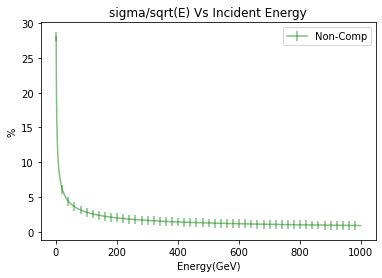

In [21]:
#Problem 3
EnergyRes=[]
IncidentE=[]
e=99 #%
h=70 #%

errore=0.5
errorh=0.4

hLowErr=[]
hHighErr=[]
eLowErr=[]
eHighErr=[]

for i in range(1,1000):
    sigma_e=(e*(2)/100)/math.sqrt(i)
    sigma_h=(h*40/100)/math.sqrt(i)
    
    #Errors
    sigma_hLowE=(h*(40-0.4)/100)/math.sqrt(i)
    sigma_hHighE=(h*(40+0.4)/100)/math.sqrt(i)
    
    sigma_eLowE=(h*(2-0.5)/100)/math.sqrt(i)
    sigma_eHighE=(h*(2+0.5)/100)/math.sqrt(i)

    hLowErr.append(sigma_hLowE)
    hHighErr.append(sigma_hHighE)
    eLowErr.append(sigma_eLowE)
    eHighErr.append(sigma_eHighE)

    EnergyRes.append(distance(sigma_e,sigma_h))
    IncidentE.append(i)
    
    
Error=distance(errore,errorh)

plt.figure()
plt.title("sigma/sqrt(E) Vs Incident Energy")
plt.errorbar(IncidentE,EnergyRes,yerr=Error,errorevery=20,c="g", alpha=0.5,
            label="Non-Comp")

ax=plt.gca()
#ax.set_xscale('log')
plt.legend(loc='upper right')
plt.ylabel('%')
plt.xlabel("Energy(GeV)")
plt.show()

10.0
500.0


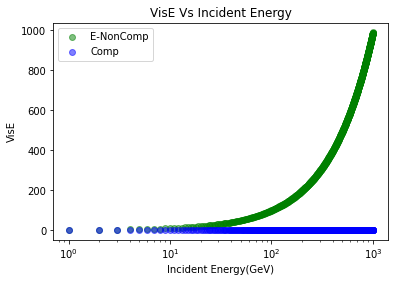

In [53]:
#Problem 3
EnergyVis=[]
EnergyVisComp=[]

IncidentE=[]
e=99/100 #%
h=70/100 #%

h2=70/100
e2=70/100

errore=0.5
errorh=0.4

hLowErr=[]
hHighErr=[]
eLowErr=[]
eHighErr=[]

for i in range(1,1001):
    Evis=(e*i)
    EvisH=(h*i)
    EvisComp=(e2/(h2+e2))*i
    #Evis=(e+h)*i
    #EvisComp=(e2+h2)*i
    EnergyVis.append(Evis)
    EnergyVisComp.append(EvisComp/i)
    if i==20:
        print(EvisComp)
    if i==1000:
        print(EvisComp)

    IncidentE.append(i)
    
    
#Error=distance(errore,errorh)

plt.figure()
plt.title("VisE Vs Incident Energy")
plt.scatter(IncidentE,EnergyVis,c="g", alpha=0.5,
            label="e-NonComp")
plt.scatter(IncidentE,EnergyVisComp,c="b", alpha=0.5,
            label="h-NonComp")
ax=plt.gca()
ax.set_xscale('log')
plt.legend(loc='upper left')
plt.ylabel('VisE')
plt.xlabel("Incident Energy(GeV)")
plt.show()